<a href="https://colab.research.google.com/github/reesha-rsh/MLb4/blob/main/Homework/Homework_2_0_Pandas_Toxic_Comments_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
#basics
import pandas as pd
import numpy as np

In [97]:
import datetime

In [98]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('fivethirtyeight')

In [99]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [100]:
train = pd.read_csv("/content/drive/MyDrive/MLb4/Homework/2.0 Pandas - Toxic Comments EDA/train_1.csv")

In [101]:
train.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.00,11.00,5.00,13.00,14.00,9.00,9.00,22.00,26.00,...,32.00,63.00,15.00,26.00,14.00,20.00,22.00,19.00,18.00,20.00
1,2PM_zh.wikipedia.org_all-access_spider,11.00,14.00,15.00,18.00,11.00,13.00,22.00,11.00,10.00,...,17.00,42.00,28.00,15.00,9.00,30.00,52.00,45.00,26.00,20.00
2,3C_zh.wikipedia.org_all-access_spider,1.00,0.00,1.00,1.00,0.00,4.00,0.00,3.00,4.00,...,3.00,1.00,1.00,7.00,4.00,4.00,6.00,3.00,4.00,17.00
3,4minute_zh.wikipedia.org_all-access_spider,35.00,13.00,10.00,94.00,4.00,26.00,14.00,9.00,11.00,...,32.00,10.00,26.00,27.00,16.00,11.00,17.00,19.00,10.00,11.00
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.00,9.00,25.00,13.00,3.00,11.00,27.00,13.00,36.00,10.00


In [102]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 609.8+ MB


In [103]:
import re
import string

In [104]:
#train["PageName"] = train["Page"].str.split(".", expand = True)[0]

In [105]:
#train["Language"] = train["PageName"].apply(lambda x: (re.split("_",str(x)))[-1])

In [106]:
#train["Language"]  = train["Page"].apply(lambda x: (re.findall("_\w{2}\.",str(x))))

In [107]:
#train[(train["Page"].str.contains("zh")==True) & (train["Page"].str.contains("wikipedia")==False)]

In [108]:
train["Language"] = train["Page"].apply(lambda x: (re.search("_(\w{2})\.wikipedia\.org",str(x)))).apply(lambda x: str(x.group(1)) if x else None )

In [109]:
train[train["Language"].isnull()]


,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,Language
13332,Accueil_commons.wikimedia.org_all-access_spider,55.00,48.00,44.00,35.00,46.00,41.00,32.00,43.00,40.00,...,74.00,34.00,62.00,88.00,57.00,74.00,61.00,51.00,60.00,None
13333,Atlas_of_Asia_commons.wikimedia.org_all-access...,5.00,3.00,4.00,6.00,3.00,1.00,5.00,6.00,6.00,...,43.00,44.00,38.00,31.00,29.00,37.00,32.00,29.00,34.00,None
13334,Atlas_of_Europe_commons.wikimedia.org_all-acce...,4.00,6.00,9.00,7.00,6.00,4.00,5.00,6.00,13.00,...,44.00,47.00,46.00,35.00,31.00,31.00,34.00,28.00,27.00,None
13335,Atlas_of_World_War_II_commons.wikimedia.org_al...,5.00,2.00,6.00,6.00,8.00,11.00,5.00,5.00,6.00,...,18.00,13.00,11.00,8.00,8.00,13.00,5.00,11.00,6.00,None
13336,Atlas_of_colonialism_commons.wikimedia.org_all...,8.00,6.00,15.00,5.00,5.00,9.00,10.00,3.00,9.00,...,32.00,40.00,38.00,29.00,19.00,30.00,29.00,26.00,26.00,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84730,help:contents_www.mediawiki.org_all-access_spider,NaN,0.00,NaN,NaN,0.00,0.00,NaN,NaN,0.00,...,7.00,8.00,15.00,7.00,18.00,17.00,15.00,3.00,11.00,None
84731,how_to_contribute_www.mediawiki.org_all-access...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,37.00,4.00,18.00,2.00,172.00,19.00,29.00,2.00,178.00,None
84732,mediawiki_www.mediawiki.org_all-access_spider,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,48.00,13.00,24.00,11.00,12.00,51.00,23.00,3.00,48.00,None
84733,special:book_www.mediawiki.org_all-access_spider,0.00,0.00,0.00,0.00,0.00,NaN,0.00,0.00,0.00,...,40.00,3.00,53.00,300.00,3.00,44.00,6.00,0.00,154.00,None


In [110]:
train.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,Language
0,2NE1_zh.wikipedia.org_all-access_spider,18.00,11.00,5.00,13.00,14.00,9.00,9.00,22.00,26.00,...,63.00,15.00,26.00,14.00,20.00,22.00,19.00,18.00,20.00,zh
1,2PM_zh.wikipedia.org_all-access_spider,11.00,14.00,15.00,18.00,11.00,13.00,22.00,11.00,10.00,...,42.00,28.00,15.00,9.00,30.00,52.00,45.00,26.00,20.00,zh
2,3C_zh.wikipedia.org_all-access_spider,1.00,0.00,1.00,1.00,0.00,4.00,0.00,3.00,4.00,...,1.00,1.00,7.00,4.00,4.00,6.00,3.00,4.00,17.00,zh
3,4minute_zh.wikipedia.org_all-access_spider,35.00,13.00,10.00,94.00,4.00,26.00,14.00,9.00,11.00,...,10.00,26.00,27.00,16.00,11.00,17.00,19.00,10.00,11.00,zh
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.00,25.00,13.00,3.00,11.00,27.00,13.00,36.00,10.00,zh


1. Вікіпедії яких країн доступні в цьому датасеті?

In [111]:
list(filter(lambda item: item is not None, train["Language"].unique()))

['zh', 'fr', 'en', 'ru', 'de', 'ja', 'es']

Відповідь до завдання 1: **['zh', 'fr', 'en', 'ru', 'de', 'ja', 'es']**

Думаю в завданні малось на увазі, на яких **мовах** доступні вікіпедії


2. Скільки сторінок з французької Вікіпедії у датасеті?

In [112]:
len(train[(train["Language"] == "fr")])

17802

Відповідь до завдання 2: **17802**

3. Вивести топ-3 статі для кожної країни за квітень 2016 року.


In [113]:
train_april_2016 = train.loc[:, (train.columns >= '2016-04-01') & (train.columns <= '2016-04-30')]
train_april_2016

,2016-04-01,2016-04-02,2016-04-03,2016-04-04,2016-04-05,2016-04-06,2016-04-07,2016-04-08,2016-04-09,2016-04-10,...,2016-04-21,2016-04-22,2016-04-23,2016-04-24,2016-04-25,2016-04-26,2016-04-27,2016-04-28,2016-04-29,2016-04-30
0,12.00,14.00,13.00,9.00,490.00,189.00,102.00,38.00,126.00,71.00,...,44.00,6.00,31.00,17.00,25.00,40.00,19.00,15.00,15.00,29.00
1,25.00,18.00,18.00,16.00,20.00,17.00,16.00,13.00,15.00,19.00,...,39.00,17.00,17.00,41.00,35.00,16.00,9.00,64.00,22.00,22.00
2,4.00,155.00,155.00,83.00,48.00,31.00,16.00,6.00,13.00,8.00,...,8.00,4.00,6.00,5.00,2.00,7.00,3.00,7.00,6.00,3.00
3,18.00,18.00,23.00,27.00,39.00,11.00,16.00,9.00,26.00,14.00,...,12.00,14.00,14.00,23.00,21.00,11.00,19.00,9.00,10.00,11.00
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.00,10.00,9.00,2.00,0.00,5.00,0.00,3.00,55.00,234.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
train_april_2016['Total'] = train_april_2016.loc[:,:].sum(axis=1, skipna=True)
train_april_2016

<ipython-input-114-e74e1b21d45a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_april_2016['Total'] = train_april_2016.loc[:,:].sum(axis=1, skipna=True)


,2016-04-01,2016-04-02,2016-04-03,2016-04-04,2016-04-05,2016-04-06,2016-04-07,2016-04-08,2016-04-09,2016-04-10,...,2016-04-22,2016-04-23,2016-04-24,2016-04-25,2016-04-26,2016-04-27,2016-04-28,2016-04-29,2016-04-30,Total
0,12.00,14.00,13.00,9.00,490.00,189.00,102.00,38.00,126.00,71.00,...,6.00,31.00,17.00,25.00,40.00,19.00,15.00,15.00,29.00,1598.00
1,25.00,18.00,18.00,16.00,20.00,17.00,16.00,13.00,15.00,19.00,...,17.00,17.00,41.00,35.00,16.00,9.00,64.00,22.00,22.00,699.00
2,4.00,155.00,155.00,83.00,48.00,31.00,16.00,6.00,13.00,8.00,...,4.00,6.00,5.00,2.00,7.00,3.00,7.00,6.00,3.00,636.00
3,18.00,18.00,23.00,27.00,39.00,11.00,16.00,9.00,26.00,14.00,...,14.00,14.00,23.00,21.00,11.00,19.00,9.00,10.00,11.00,651.00
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.00,9.00,2.00,0.00,5.00,0.00,3.00,55.00,234.00,529.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
145059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
145060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
145061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00


In [115]:
train_april_2016['Page'] = train.loc[:,'Page']
train_april_2016['Language'] = train['Language']

<ipython-input-115-0dcbef1c265f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_april_2016['Page'] = train.loc[:,'Page']
<ipython-input-115-0dcbef1c265f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_april_2016['Language'] = train['Language']


In [116]:
train_april_2016

,2016-04-01,2016-04-02,2016-04-03,2016-04-04,2016-04-05,2016-04-06,2016-04-07,2016-04-08,2016-04-09,2016-04-10,...,2016-04-24,2016-04-25,2016-04-26,2016-04-27,2016-04-28,2016-04-29,2016-04-30,Total,Page,Language
0,12.00,14.00,13.00,9.00,490.00,189.00,102.00,38.00,126.00,71.00,...,17.00,25.00,40.00,19.00,15.00,15.00,29.00,1598.00,2NE1_zh.wikipedia.org_all-access_spider,zh
1,25.00,18.00,18.00,16.00,20.00,17.00,16.00,13.00,15.00,19.00,...,41.00,35.00,16.00,9.00,64.00,22.00,22.00,699.00,2PM_zh.wikipedia.org_all-access_spider,zh
2,4.00,155.00,155.00,83.00,48.00,31.00,16.00,6.00,13.00,8.00,...,5.00,2.00,7.00,3.00,7.00,6.00,3.00,636.00,3C_zh.wikipedia.org_all-access_spider,zh
3,18.00,18.00,23.00,27.00,39.00,11.00,16.00,9.00,26.00,14.00,...,23.00,21.00,11.00,19.00,9.00,10.00,11.00,651.00,4minute_zh.wikipedia.org_all-access_spider,zh
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.00,0.00,5.00,0.00,3.00,55.00,234.00,529.00,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,zh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,Underworld_(serie_de_películas)_es.wikipedia.o...,es
145059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,Resident_Evil:_Capítulo_Final_es.wikipedia.org...,es
145060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,Enamorándome_de_Ramón_es.wikipedia.org_all-acc...,es
145061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,Hasta_el_último_hombre_es.wikipedia.org_all-ac...,es


In [117]:
# Group the DataFrame by 'Language'
grouped_train_april_2016 = train_april_2016.groupby('Language')

# Initialize an empty list to store the top pages for each language
top_pages = []

# Iterate over each group (language)
for language, group in grouped_train_april_2016:
    # Sort the group by 'Total' column in descending order and get the top 3 pages
    top_3_pages = group.sort_values('Total', ascending=False).head(3)
    # Append the top pages to the 'top_pages' list
    top_pages.append(top_3_pages)

# Concatenate the top pages into a single DataFrame
result = pd.concat(top_pages)

# Display the top pages for each language
result[["Page", "Language","Total"]]

,Page,Language,Total
139119,Wikipedia:Hauptseite_de.wikipedia.org_all-acce...,de,88363668.00
116196,Wikipedia:Hauptseite_de.wikipedia.org_mobile-w...,de,64100812.00
67049,Wikipedia:Hauptseite_de.wikipedia.org_desktop_...,de,21860593.00
38573,Main_Page_en.wikipedia.org_all-access_all-agents,en,516794194.00
9774,Main_Page_en.wikipedia.org_desktop_all-agents,en,350117912.00
74114,Main_Page_en.wikipedia.org_mobile-web_all-agents,en,162035332.00
92205,Wikipedia:Portada_es.wikipedia.org_all-access_...,es,41410468.00
95855,Wikipedia:Portada_es.wikipedia.org_mobile-web_...,es,31690145.00
90810,Especial:Buscar_es.wikipedia.org_all-access_al...,es,13175416.00
27330,Wikipédia:Accueil_principal_fr.wikipedia.org_a...,fr,48105801.00


4. Знайти сторінку англійської вікіпедії з найбільшим середнім/медіаною/дисперсією за липень 2016 року.


In [118]:
en_train_april_2016 = train_april_2016[train_april_2016['Language'] == 'en']
en_train_april_2016

,2016-04-01,2016-04-02,2016-04-03,2016-04-04,2016-04-05,2016-04-06,2016-04-07,2016-04-08,2016-04-09,2016-04-10,...,2016-04-24,2016-04-25,2016-04-26,2016-04-27,2016-04-28,2016-04-29,2016-04-30,Total,Page,Language
8357,33.00,22.00,3.00,3.00,8.00,0.00,4.00,4.00,4.00,2.00,...,4.00,4.00,2.00,3.00,2.00,4.00,3.00,138.00,!vote_en.wikipedia.org_desktop_all-agents,en
8358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,"""Awaken,_My_Love!""_en.wikipedia.org_desktop_al...",en
8359,3.00,8.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.00,1.00,NaN,NaN,1.00,2.00,1.00,18.00,"""European_Society_for_Clinical_Investigation""_...",en
8360,1366.00,1171.00,1251.00,1442.00,1846.00,1451.00,1458.00,1328.00,1242.00,1253.00,...,1565.00,1876.00,1711.00,1795.00,1544.00,1675.00,1454.00,175617.00,"""Weird_Al""_Yankovic_en.wikipedia.org_desktop_a...",en
8361,842.00,1262.00,552.00,851.00,819.00,1101.00,793.00,716.00,514.00,599.00,...,699.00,974.00,894.00,1117.00,978.00,901.00,598.00,25112.00,100_metres_en.wikipedia.org_desktop_all-agents,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113946,2.00,NaN,NaN,NaN,8.00,2.00,NaN,2.00,1.00,1.00,...,NaN,1.00,1.00,2.00,1.00,3.00,NaN,39.00,Zikanyrops_sparsa_en.wikipedia.org_all-access_...,en
113947,10.00,17.00,21.00,18.00,20.00,20.00,7.00,9.00,3.00,3.00,...,3.00,6.00,3.00,236.00,7.00,9.00,6.00,466.00,Zillur_Rahman_John_en.wikipedia.org_all-access...,en
113948,5.00,9.00,5.00,8.00,1.00,7.00,4.00,7.00,2.00,5.00,...,8.00,13.00,5.00,7.00,2.00,11.00,5.00,197.00,Zitadelle_en.wikipedia.org_all-access_all-agents,en
113949,3.00,2.00,4.00,4.00,2.00,5.00,NaN,5.00,NaN,2.00,...,NaN,3.00,2.00,2.00,2.00,2.00,1.00,72.00,"Zovashen_(Dzhannatlu),_Ararat_en.wikipedia.org...",en


In [119]:
en_train_april_2016.loc[:,'mean'] = en_train_april_2016.iloc[:,:-4].mean(axis=1,numeric_only=True)
en_train_april_2016.loc[:,'median'] = en_train_april_2016.iloc[:,:-4].median(axis=1,numeric_only=True)
en_train_april_2016.loc[:,'std'] = en_train_april_2016.iloc[:,:-4].std (axis=1,numeric_only=True)

en_train_april_2016

<ipython-input-119-fced0a937bd1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  en_train_april_2016.loc[:,'mean'] = en_train_april_2016.iloc[:,:-4].mean(axis=1,numeric_only=True)
<ipython-input-119-fced0a937bd1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  en_train_april_2016.loc[:,'median'] = en_train_april_2016.iloc[:,:-4].median(axis=1,numeric_only=True)
<ipython-input-119-fced0a937bd1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,2016-04-01,2016-04-02,2016-04-03,2016-04-04,2016-04-05,2016-04-06,2016-04-07,2016-04-08,2016-04-09,2016-04-10,...,2016-04-27,2016-04-28,2016-04-29,2016-04-30,Total,Page,Language,mean,median,std
8357,33.00,22.00,3.00,3.00,8.00,0.00,4.00,4.00,4.00,2.00,...,3.00,2.00,4.00,3.00,138.00,!vote_en.wikipedia.org_desktop_all-agents,en,4.66,3.00,24.81
8358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.00,"""Awaken,_My_Love!""_en.wikipedia.org_desktop_al...",en,NaN,NaN,NaN
8359,3.00,8.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.00,2.00,1.00,18.00,"""European_Society_for_Clinical_Investigation""_...",en,2.43,1.00,5.72
8360,1366.00,1171.00,1251.00,1442.00,1846.00,1451.00,1458.00,1328.00,1242.00,1253.00,...,1795.00,1544.00,1675.00,1454.00,175617.00,"""Weird_Al""_Yankovic_en.wikipedia.org_desktop_a...",en,6005.62,1501.00,37978.76
8361,842.00,1262.00,552.00,851.00,819.00,1101.00,793.00,716.00,514.00,599.00,...,1117.00,978.00,901.00,598.00,25112.00,100_metres_en.wikipedia.org_desktop_all-agents,en,845.31,855.00,4364.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113946,2.00,NaN,NaN,NaN,8.00,2.00,NaN,2.00,1.00,1.00,...,2.00,1.00,3.00,NaN,39.00,Zikanyrops_sparsa_en.wikipedia.org_all-access_...,en,1.95,2.00,8.23
113947,10.00,17.00,21.00,18.00,20.00,20.00,7.00,9.00,3.00,3.00,...,236.00,7.00,9.00,6.00,466.00,Zillur_Rahman_John_en.wikipedia.org_all-access...,en,15.86,6.50,90.85
113948,5.00,9.00,5.00,8.00,1.00,7.00,4.00,7.00,2.00,5.00,...,7.00,2.00,11.00,5.00,197.00,Zitadelle_en.wikipedia.org_all-access_all-agents,en,6.62,6.50,34.33
113949,3.00,2.00,4.00,4.00,2.00,5.00,NaN,5.00,NaN,2.00,...,2.00,2.00,2.00,1.00,72.00,"Zovashen_(Dzhannatlu),_Ararat_en.wikipedia.org...",en,2.73,2.00,13.16


**ВІДПОВІДЬ** ДО ЗАВДАННЯ 4

In [120]:
#Top mean
en_train_april_2016.sort_values('mean', ascending=False).head(1).loc[:,'Page']

38573    Main_Page_en.wikipedia.org_all-access_all-agents
Name: Page, dtype: object

In [121]:
#Top median
en_train_april_2016.sort_values('median', ascending=False).head(1).loc[:,'Page']

38573    Main_Page_en.wikipedia.org_all-access_all-agents
Name: Page, dtype: object

In [122]:
#Top std
en_train_april_2016.sort_values('std', ascending=False).head(1).loc[:,'Page']

38573    Main_Page_en.wikipedia.org_all-access_all-agents
Name: Page, dtype: object

5. Які статі отримали найбільший буст по переглядам за травень 2016 року в абсолютних показниках і відносних. (розглядати сторінки щонайменше з 1000 переглядами)

In [123]:
train_may_2016 = train.loc[:, (train.columns >= '2016-05-01') & (train.columns <= '2016-05-31')]
train_may_2016

,2016-05-01,2016-05-02,2016-05-03,2016-05-04,2016-05-05,2016-05-06,2016-05-07,2016-05-08,2016-05-09,2016-05-10,...,2016-05-22,2016-05-23,2016-05-24,2016-05-25,2016-05-26,2016-05-27,2016-05-28,2016-05-29,2016-05-30,2016-05-31
0,18.00,16.00,13.00,20.00,22.00,19.00,11.00,50.00,22.00,39.00,...,14.00,10.00,21.00,20.00,19.00,14.00,12.00,15.00,17.00,16.00
1,66.00,33.00,30.00,16.00,18.00,45.00,17.00,88.00,23.00,18.00,...,17.00,10.00,14.00,18.00,9.00,16.00,17.00,6.00,15.00,18.00
2,1.00,6.00,2.00,1.00,3.00,8.00,3.00,5.00,4.00,7.00,...,5.00,9.00,4.00,5.00,7.00,1.00,5.00,1.00,5.00,4.00
3,14.00,9.00,5.00,10.00,20.00,22.00,16.00,9.00,10.00,42.00,...,23.00,23.00,17.00,6.00,14.00,13.00,13.00,9.00,11.00,35.00
4,57.00,5.00,4.00,4.00,0.00,9.00,9.00,6.00,6.00,6.00,...,2.00,5.00,5.00,8.00,8.00,6.00,3.00,7.00,7.00,6.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [124]:
# I will take into considearation only pages which Mean Value is higher than 1000
train_may_2016.loc[:,'mean'] = train_may_2016.mean(axis=1,numeric_only=True)
train_may_2016 = train_may_2016[train_may_2016['mean'] > 1000]

train_may_2016

<ipython-input-124-1de3205c5f65>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_may_2016.loc[:,'mean'] = train_may_2016.mean(axis=1,numeric_only=True)


,2016-05-01,2016-05-02,2016-05-03,2016-05-04,2016-05-05,2016-05-06,2016-05-07,2016-05-08,2016-05-09,2016-05-10,...,2016-05-23,2016-05-24,2016-05-25,2016-05-26,2016-05-27,2016-05-28,2016-05-29,2016-05-30,2016-05-31,mean
139,8485.00,5994.00,6944.00,18193.00,34972.00,34421.00,16288.00,6945.00,6045.00,6777.00,...,5027.00,50383.00,19781.00,19017.00,14334.00,9483.00,9270.00,6711.00,2155.00,14113.19
375,679.00,902.00,962.00,1138.00,1466.00,1074.00,1127.00,1015.00,914.00,1092.00,...,1160.00,1042.00,911.00,1016.00,1145.00,899.00,896.00,953.00,1050.00,1020.48
782,51818.00,59418.00,62896.00,60037.00,59563.00,76744.00,88069.00,70805.00,72142.00,57909.00,...,6932.00,7388.00,7315.00,7415.00,7056.00,14583.00,10041.00,7137.00,6803.00,33428.13
1964,4651.00,4117.00,2570.00,2603.00,3964.00,3998.00,3586.00,3273.00,2709.00,2820.00,...,3833.00,2900.00,4551.00,4896.00,5103.00,5227.00,3294.00,2779.00,4754.00,4506.84
3160,3798.00,719.00,6693.00,5791.00,2261.00,2413.00,1537.00,3814.00,850.00,1437.00,...,1543.00,1462.00,1582.00,1829.00,1954.00,1823.00,1745.00,1730.00,712.00,2192.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141487,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,505.00,355.00,256.00,188.00,187.00,133.00,167.00,307.00,246.00,3976.37
142038,2172.00,14154.00,2239.00,5058.00,3305.00,1993.00,1474.00,2443.00,2325.00,2572.00,...,2889.00,2184.00,2285.00,2743.00,2724.00,5068.00,3596.00,4125.00,4151.00,3424.13
142040,785.00,1609.00,963.00,1359.00,1354.00,840.00,607.00,856.00,960.00,845.00,...,1142.00,1032.00,955.00,1117.00,1114.00,1889.00,1519.00,1447.00,1488.00,1202.90
142875,12076.00,15315.00,17396.00,6991.00,8926.00,9257.00,12709.00,10081.00,12235.00,9682.00,...,6238.00,6937.00,11676.00,14471.00,9609.00,6153.00,4985.00,4969.00,15007.00,9440.74


In [125]:
# Add back Page and Lang columns
train_may_2016.loc[:,'Page'] = train.loc[:,'Page']
train_april_2016.loc[:,'Language'] = train.loc[:,'Language']
train_may_2016

<ipython-input-125-bac22ead7b97>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_may_2016.loc[:,'Page'] = train.loc[:,'Page']
<ipython-input-125-bac22ead7b97>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_april_2016.loc[:,'Language'] = train.loc[:,'Language']


,2016-05-01,2016-05-02,2016-05-03,2016-05-04,2016-05-05,2016-05-06,2016-05-07,2016-05-08,2016-05-09,2016-05-10,...,2016-05-24,2016-05-25,2016-05-26,2016-05-27,2016-05-28,2016-05-29,2016-05-30,2016-05-31,mean,Page
139,8485.00,5994.00,6944.00,18193.00,34972.00,34421.00,16288.00,6945.00,6045.00,6777.00,...,50383.00,19781.00,19017.00,14334.00,9483.00,9270.00,6711.00,2155.00,14113.19,Special:Search_zh.wikipedia.org_all-access_spider
375,679.00,902.00,962.00,1138.00,1466.00,1074.00,1127.00,1015.00,914.00,1092.00,...,1042.00,911.00,1016.00,1145.00,899.00,896.00,953.00,1050.00,1020.48,Special:搜索_zh.wikipedia.org_all-access_spider
782,51818.00,59418.00,62896.00,60037.00,59563.00,76744.00,88069.00,70805.00,72142.00,57909.00,...,7388.00,7315.00,7415.00,7056.00,14583.00,10041.00,7137.00,6803.00,33428.13,Wikipedia:首页_zh.wikipedia.org_all-access_spider
1964,4651.00,4117.00,2570.00,2603.00,3964.00,3998.00,3586.00,3273.00,2709.00,2820.00,...,2900.00,4551.00,4896.00,5103.00,5227.00,3294.00,2779.00,4754.00,4506.84,Project:上传_zh.wikipedia.org_all-access_spider
3160,3798.00,719.00,6693.00,5791.00,2261.00,2413.00,1537.00,3814.00,850.00,1437.00,...,1462.00,1582.00,1829.00,1954.00,1823.00,1745.00,1730.00,712.00,2192.55,Special:用户登录_zh.wikipedia.org_all-access_spider
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141487,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,355.00,256.00,188.00,187.00,133.00,167.00,307.00,246.00,3976.37,Rodrigo_Espíndola_de.wikipedia.org_all-access_...
142038,2172.00,14154.00,2239.00,5058.00,3305.00,1993.00,1474.00,2443.00,2325.00,2572.00,...,2184.00,2285.00,2743.00,2724.00,5068.00,3596.00,4125.00,4151.00,3424.13,Especial:Entrar_es.wikipedia.org_all-access_sp...
142040,785.00,1609.00,963.00,1359.00,1354.00,840.00,607.00,856.00,960.00,845.00,...,1032.00,955.00,1117.00,1114.00,1889.00,1519.00,1447.00,1488.00,1202.90,Especial:Libro_es.wikipedia.org_all-access_spider
142875,12076.00,15315.00,17396.00,6991.00,8926.00,9257.00,12709.00,10081.00,12235.00,9682.00,...,6937.00,11676.00,14471.00,9609.00,6153.00,4985.00,4969.00,15007.00,9440.74,Special:Search_es.wikipedia.org_all-access_spider


In [126]:
# Repalce 0 with 0.1 to avoid dividing by zero and getting Infinity when caculating Relative Boost
train_may_2016.loc[train_may_2016['2016-05-01'] ==0, '2016-05-01'] = 0.1

In [127]:
# To find the boost in May 2016  I will compare the value of the first of the month vs Max value during the month
# So first I will find the Max value

train_may_2016.loc[:,'max'] = train_may_2016.max(axis=1,numeric_only=True)

train_may_2016 = train_may_2016.assign(BoostAbsolute = lambda x: (x['max'] - x['2016-05-01']))
train_may_2016 = train_may_2016.assign(BoostRelative = lambda x: (x['BoostAbsolute'] / x['2016-05-01']))

train_may_2016

<ipython-input-127-f88098015530>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_may_2016.loc[:,'max'] = train_may_2016.max(axis=1,numeric_only=True)


,2016-05-01,2016-05-02,2016-05-03,2016-05-04,2016-05-05,2016-05-06,2016-05-07,2016-05-08,2016-05-09,2016-05-10,...,2016-05-27,2016-05-28,2016-05-29,2016-05-30,2016-05-31,mean,Page,max,BoostAbsolute,BoostRelative
139,8485.00,5994.00,6944.00,18193.00,34972.00,34421.00,16288.00,6945.00,6045.00,6777.00,...,14334.00,9483.00,9270.00,6711.00,2155.00,14113.19,Special:Search_zh.wikipedia.org_all-access_spider,50383.00,41898.00,4.94
375,679.00,902.00,962.00,1138.00,1466.00,1074.00,1127.00,1015.00,914.00,1092.00,...,1145.00,899.00,896.00,953.00,1050.00,1020.48,Special:搜索_zh.wikipedia.org_all-access_spider,1466.00,787.00,1.16
782,51818.00,59418.00,62896.00,60037.00,59563.00,76744.00,88069.00,70805.00,72142.00,57909.00,...,7056.00,14583.00,10041.00,7137.00,6803.00,33428.13,Wikipedia:首页_zh.wikipedia.org_all-access_spider,88069.00,36251.00,0.70
1964,4651.00,4117.00,2570.00,2603.00,3964.00,3998.00,3586.00,3273.00,2709.00,2820.00,...,5103.00,5227.00,3294.00,2779.00,4754.00,4506.84,Project:上传_zh.wikipedia.org_all-access_spider,22327.00,17676.00,3.80
3160,3798.00,719.00,6693.00,5791.00,2261.00,2413.00,1537.00,3814.00,850.00,1437.00,...,1954.00,1823.00,1745.00,1730.00,712.00,2192.55,Special:用户登录_zh.wikipedia.org_all-access_spider,7402.00,3604.00,0.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141487,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,187.00,133.00,167.00,307.00,246.00,3976.37,Rodrigo_Espíndola_de.wikipedia.org_all-access_...,27505.00,NaN,NaN
142038,2172.00,14154.00,2239.00,5058.00,3305.00,1993.00,1474.00,2443.00,2325.00,2572.00,...,2724.00,5068.00,3596.00,4125.00,4151.00,3424.13,Especial:Entrar_es.wikipedia.org_all-access_sp...,14154.00,11982.00,5.52
142040,785.00,1609.00,963.00,1359.00,1354.00,840.00,607.00,856.00,960.00,845.00,...,1114.00,1889.00,1519.00,1447.00,1488.00,1202.90,Especial:Libro_es.wikipedia.org_all-access_spider,2027.00,1242.00,1.58
142875,12076.00,15315.00,17396.00,6991.00,8926.00,9257.00,12709.00,10081.00,12235.00,9682.00,...,9609.00,6153.00,4985.00,4969.00,15007.00,9440.74,Special:Search_es.wikipedia.org_all-access_spider,17396.00,5320.00,0.44


**ВІДПОВІДЬ** ДО ЗАВДАННЯ 5

In [128]:
# Top 5 Pages that got boost in May 2016 by absolute change
train_may_2016.sort_values('BoostAbsolute', ascending=False)[['Page','2016-05-01', 'max', 'BoostAbsolute',	'BoostRelative']].head(5)

,Page,2016-05-01,max,BoostAbsolute,BoostRelative
9774,Main_Page_en.wikipedia.org_desktop_all-agents,12622325.00,15615464.00,2993139.00,0.24
38573,Main_Page_en.wikipedia.org_all-access_all-agents,18196421.00,21098266.00,2901845.00,0.16
42011,Azúcar_Moreno_en.wikipedia.org_all-access_all-...,77.00,2581285.00,2581208.00,33522.18
13287,Azúcar_Moreno_en.wikipedia.org_desktop_all-agents,30.00,2581057.00,2581027.00,86034.23
92297,Historia_de_Morelia_es.wikipedia.org_all-acces...,22.00,1316224.00,1316202.00,59827.36


In [129]:
# Top 5 Pages that got boost in May 2016 by relative change
train_may_2016.sort_values('BoostRelative', ascending=False)[['Page','2016-05-01', 'max', 'BoostAbsolute',	'BoostRelative']].head(5)

,Page,2016-05-01,max,BoostAbsolute,BoostRelative
76070,Rinku_Rajguru_en.wikipedia.org_mobile-web_all-...,0.10,27661.00,27660.90,276609.00
97521,Capitán_América:_Civil_war_es.wikipedia.org_mo...,0.10,23720.00,23719.90,237199.00
86829,イグデスマン&ジョー_ja.wikipedia.org_desktop_all-agents,4.00,608461.00,608457.00,152114.25
71276,Historia_de_Morelia_es.wikipedia.org_desktop_a...,12.00,1316163.00,1316151.00,109679.25
120708,イグデスマン&ジョー_ja.wikipedia.org_all-access_all-agents,7.00,608630.00,608623.00,86946.14


6. Візуалізувати кількість переглядів для топ-5 сторінок англійської Вікіпедії на одному графіку за перше півріччя 2016 року.

In [130]:
train_firsthalf_2016 = train.loc[:, (train.columns >= '2016-01-01') & (train.columns <= '2016-06-30') ]

In [131]:
# Add Total column
train_firsthalf_2016.loc[:,'Total'] = train_firsthalf_2016.loc[:,:].sum(axis=1, skipna=True)

# Add back Page and Lang columns
train_firsthalf_2016.loc[:,'Page'] = train.loc[:,'Page']
train_firsthalf_2016.loc[:,'Language'] = train.loc[:,'Language']

<ipython-input-131-c35e4a5bff9f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_firsthalf_2016.loc[:,'Total'] = train_firsthalf_2016.loc[:,:].sum(axis=1, skipna=True)
<ipython-input-131-c35e4a5bff9f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_firsthalf_2016.loc[:,'Page'] = train.loc[:,'Page']
<ipython-input-131-c35e4a5bff9f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [132]:
en_train_firsthalf_2016 = train_firsthalf_2016[train_firsthalf_2016['Language'] == 'en'].sort_values('Total', ascending=False)
en_train_firsthalf_2016

,2016-01-01,2016-01-02,2016-01-03,2016-01-04,2016-01-05,2016-01-06,2016-01-07,2016-01-08,2016-01-09,2016-01-10,...,2016-06-24,2016-06-25,2016-06-26,2016-06-27,2016-06-28,2016-06-29,2016-06-30,Total,Page,Language
38573,16357307.00,17614566.00,17537448.00,19232035.00,18142931.00,18377878.00,17277663.00,16437934.00,16439118.00,17278324.00,...,17865705.00,19308710.00,20247955.00,18666240.00,20016297.00,19576627.00,23209383.00,3287060659.00,Main_Page_en.wikipedia.org_all-access_all-agents,en
9774,9170612.00,10333223.00,10160444.00,12163450.00,10957266.00,11417741.00,10467866.00,9820057.00,9665577.00,10513942.00,...,12504182.00,14098393.00,14850970.00,13359608.00,14923570.00,14330879.00,15284126.00,2204459608.00,Main_Page_en.wikipedia.org_desktop_all-agents,en
74114,6920930.00,7011530.00,7093516.00,6827320.00,6951483.00,6730292.00,6580284.00,6386762.00,6520497.00,6496216.00,...,5166741.00,5008360.00,5181315.00,5112765.00,4903957.00,5059084.00,7740443.00,1045326598.00,Main_Page_en.wikipedia.org_mobile-web_all-agents,en
39180,1794204.00,1811792.00,1888684.00,2123412.00,2147114.00,2339089.00,2378508.00,2210156.00,1946522.00,2063624.00,...,1859212.00,1535125.00,1651204.00,2105739.00,2110458.00,2429900.00,2425386.00,378843357.00,Special:Search_en.wikipedia.org_all-access_all...,en
10403,1401667.00,1395136.00,1455522.00,1750373.00,1787494.00,1952324.00,1972186.00,1804425.00,1483316.00,1576497.00,...,1525665.00,1186263.00,1282109.00,1725856.00,1715507.00,2010241.00,2012923.00,309559252.00,Special:Search_en.wikipedia.org_desktop_all-ag...,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,Sean_Spicer_en.wikipedia.org_mobile-web_all-ag...,en
74608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,Scarlett_Moffatt_en.wikipedia.org_mobile-web_a...,en
111664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,"King's_Wood,_Corby_en.wikipedia.org_all-access...",en
113302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,Structural_scheduling_of_synthetic_cannabinoid...,en


In [133]:
# Only top 5
x = en_train_firsthalf_2016[['Page', 'Total']].head(5)

x

,Page,Total
38573,Main_Page_en.wikipedia.org_all-access_all-agents,3287060659.00
9774,Main_Page_en.wikipedia.org_desktop_all-agents,2204459608.00
74114,Main_Page_en.wikipedia.org_mobile-web_all-agents,1045326598.00
39180,Special:Search_en.wikipedia.org_all-access_all...,378843357.00
10403,Special:Search_en.wikipedia.org_desktop_all-ag...,309559252.00


**ВІДПОВІДЬ** ДО ЗАВДАННЯ 6

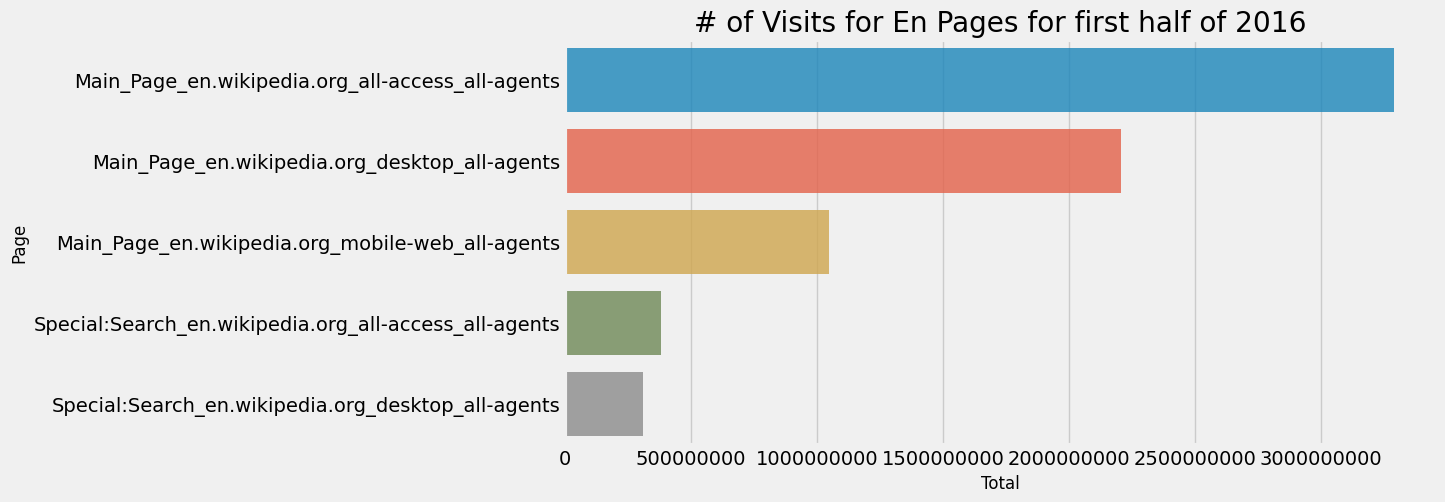

In [134]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x = x['Total'].values.round(2), y = x['Page'] , alpha=0.8)
plt.title("# of Visits for En Pages for first half of 2016")
plt.ylabel('Page', fontsize=12)
plt.xlabel('Total', fontsize=12)
plt.gca().get_xaxis().get_major_formatter().set_scientific(False)

plt.show()

7. Порівняти розподіли німецьких і французьких сторінок вікіпедії за червень 2016 року.
8. Порівняти кількість переглядів для сторінок японської вікіпедії з розбивкою по дням тижня.